In [1]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

Ubuntu 22.04.3 LTS \n \l

Linux 4be7bc1b4204 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


MemTotal:       13290460 kB


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   43G   66G  40% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   60K  6.4G   1% /var/colab
/dev/sda1        70G   52G   18G  75% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


/usr/local/bin/python


Python 3.10.12




In [6]:
# Instalando conda (mamba)
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [8]:
# Instalando pacotes necessários
!mamba install -c conda-forge cartopy siphon metpy imgaug pygrib boto3 netcdf4
!apt-get -qq install libproj-dev libgeos-dev
!pip uninstall shapely -y
!pip install shapely --no-binary shapely
!pip install pyyaml==5.4.1

# Instalando / atualizando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'
print('\n')

# Install ImageMagick
!sudo apt install imagemagick
print('\n')


Looking for: ['cartopy', 'siphon', 'metpy', 'imgaug', 'pygrib', 'boto3', 'netcdf4']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed

Found existing installation: shapely 2.0.6
Uninstalling shapely-2.0.6:
  Successfully uninstalled shapely-2.0.6
  Using cached shapely-2.0.6-cp310-cp310-linux_x86_64.whl
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

×

In [2]:
# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

# Download do script "utilities.py", do curso de processamento de satélites, com algumas funções que facilitam a manipulação de dados de satélite
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py
print('\n')

# Download da arquivo CPT exemplo (para realce de canais IR)
!wget -c https://www.dropbox.com/s/fdgnaqt91cy3x97/IR4AVHRR6.cpt
print('\n')

# Download da arquivo CPT exemplo (para realce de canais WV)
!wget -c https://www.dropbox.com/s/4l9fys6pv5c68xk/SVGAWVX_TEMP.cpt
print('\n')

--2024-09-18 20:05:37--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  8.12MB/s    in 1.3s    

2024-09-18 20:05:39 (8.12 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]



Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


--2024-09-18 20:05:39--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_prov

In [9]:
# A whole bunch of imports
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter
from siphon.catalog import TDSCatalog
import xarray as xr
from metpy.io import GiniFile
from metpy.plots.ctables import registry
from metpy.units import units
import metpy.calc as mpcalc


# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from netCDF4 import num2date
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
from matplotlib import patheffects
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import cartopy.feature as cfeature
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
import numpy.ma as ma
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------


ModuleNotFoundError: No module named 'numpy.lib.array_utils'

In [ ]:
dt = datetime(2024, 09, 18, 12)

#yyyymmddhhmn = '202107211200' # CHANGE THIS DATE TO THE SAME DATE OF YOUR NWP DATA
yyyymmddhhmn = (f'{dt:%Y%m%d%H}00') # CHANGE THIS DATE TO THE SAME DATE OF YOUR NWP DATA

# Assemble our URL to the THREDDS Data Server catalog,
# and access our desired dataset within via NCSS
#base_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_onedeg_ana/GFS_Global_onedeg_ana_'
#cat = TDSCatalog(f'{base_url}{dt:%Y%m%d}_{dt:%H}00.grib2/catalog.xml')
base_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg_ana/GFS_Global_0p25deg_ana_'
#base_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/GFS_Global_0p25deg_'
cat = TDSCatalog(f'{base_url}{dt:%Y%m%d}_{dt:%H}00.grib2/catalog.xml')
ncss = cat.datasets[0].subset()

# Setando
nivel_vento = 925
nivel_omega = 500
#lat_sul = -30
#lat_norte = 30
#lon_leste = 360
#lon_oeste = 230
# para imagem de satélite, lon tem q ser de -180 a 180
lat_sul = -30
lat_norte = 30
lon_leste = -10
lon_oeste = -120
# para gfs, lon tem que ser de 0 a 360
lon_l = lon_leste + 360
lon_o = lon_oeste + 360

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [lon_oeste, lat_sul, lon_leste, lat_norte]

# First get wind components data
query_wind = ncss.query()
query_wind.variables('u-component_of_wind_isobaric',
                     'v-component_of_wind_isobaric').add_lonlat().accept('netcdf')
query_wind.vertical_level(nivel_vento * 100)
query_wind.lonlat_box(north=lat_norte, south=lat_sul, east=lon_l, west=lon_o)
data_wind = ncss.get_data(query_wind)

# Get Precipitable Water
query_prtwt = ncss.query()
query_prtwt.variables('Precipitable_water_entire_atmosphere_single_layer').add_lonlat().accept('netcdf')
query_prtwt.lonlat_box(north=lat_norte, south=lat_sul, east=lon_l, west=lon_o)
data_prtwt = ncss.get_data(query_prtwt)

# Get omega
query_omega = ncss.query()
query_omega.variables('Vertical_velocity_pressure_isobaric').add_lonlat().accept('netcdf')
query_omega.vertical_level(nivel_omega * 100)
query_omega.lonlat_box(north=lat_norte, south=lat_sul, east=lon_l, west=lon_o)
data_omega = ncss.get_data(query_omega)

In [ ]:
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)
#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]

In [ ]:
# Tem que fazer esta alteração para conseguir plotar o vento - ou seja, deixa a lon de -180 a 180
lon =  data_wind.variables['longitude'][:]
for i in range(len(lon)):
    if lon[i]>180:
        lon[i] = lon[i]-360

In [ ]:
prtwt = data_prtwt.variables['Precipitable_water_entire_atmosphere_single_layer'][:].squeeze()

uwnd_nivel = data_wind.variables['u-component_of_wind_isobaric'][:].squeeze()
vwnd_nivel = data_wind.variables['v-component_of_wind_isobaric'][:].squeeze()
omega_nivel = data_omega.variables['Vertical_velocity_pressure_isobaric'][:].squeeze()

U_nivel = units('m/s') * ndimage.gaussian_filter(uwnd_nivel, sigma=1, order=0)
V_nivel = units('m/s') * ndimage.gaussian_filter(vwnd_nivel, sigma=1, order=0)
W_nivel = units('Pa/s') * ndimage.gaussian_filter(omega_nivel, sigma=1, order=0)

#lon = data_prtwt.variables['lon'][:]
lat = data_prtwt.variables['latitude'][:]
time = data_prtwt.variables[data_prtwt.variables['Precipitable_water_entire_atmosphere_single_layer'].dimensions[0]]
vtime = num2date(time[:], time.units)

In [ ]:
#Quero somente os valores negativos de omega
mask_omega = ma.masked_greater_equal(W_nivel, 0).mask
W_nivel[mask_omega] = np.nan

/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


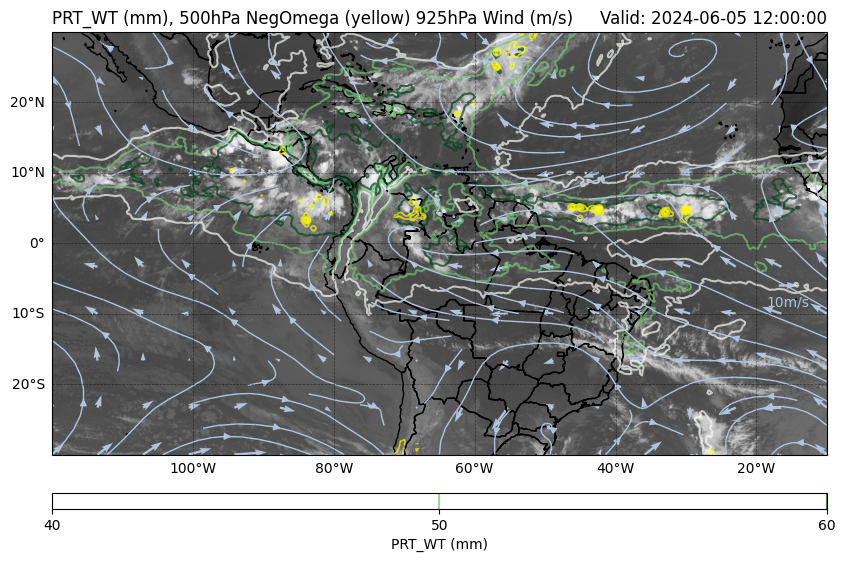

In [ ]:
# Create the figure
datacrs = ccrs.PlateCarree()

# Choose the plot size (width x height, in inches)
fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(1, 1, 1, projection=datacrs)
# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_oeste, lon_leste, lat_sul, lat_norte], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)


# Add mapping information
# Add state boundaries to plot
states_provinces = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', linewidth=1)
# Add country borders to plot
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                                               name='admin_0_countries',
                                               scale='50m', facecolor='none')
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

# Plotando agua precipitavel acima de 40 mm
clevppt = np.arange(40, 70, 10)
cs2 = ax.contour(lon, lat,prtwt,clevppt,cmap = 'Greens', alpha=0.7)
cb = plt.colorbar(cs2,label='PRT_WT (mm)',orientation="horizontal", pad=0.05,aspect=50)

#Plotando omega negativo
cs = ax.contour(lon, lat,W_nivel*1e4, colors='yellow', linewidths=1.25,linestyles='solid',transform=ccrs.PlateCarree(), alpha=0.7)

# Create a flag to determine which barbs are flipped
#flip_flag = np.zeros((U_nivel[0],U_nivel[1]))

# All flags below the equator will be flipped
#flip_flag[lat < 0] = 1

# Plot the barbs
#img3 = ax.barbs(lon[::4,::4], lat[::4,::4], U_nivel[::4,::4], V_nivel[::4,::4], length = 5.0, sizes = dict(emptybarb=0.0, spacing=0.2, height=0.5), linewidth=0.8, pivot='middle', barbcolor='gray', flip_barb = flip_flag[::4,::4])
#uv = ax.barbs(lon, lat, U_nivel, V_nivel, color='lightsteelblue', transform=ccrs.PlateCarree())

uv = ax.quiver(lon, lat, U_nivel, V_nivel, color='lightsteelblue',regrid_shape=10,
          width=0.003, scale = 400, transform=ccrs.PlateCarree())
#Draw the wind field, and after the arrow shaft, you have to explain the relationship between the length of the shaft and the wind speed
#Calling quiver can generate reference arrow + label.
ax.quiverkey(uv,                     #Incoming quiver handle
             X=0.95, Y = 0.4,       #Determine the location of label, all limited to [0,1]
             U = 10,                    #Reference arrow length means the wind speed is 5m/s.
             angle = 0,            #Reference arrow placement angle. The default is 0, which means horizontal placement
             label='10m/s',        #Arrow's supplement: label's content +
             labelpos='S',          #label is in which direction of the reference arrow; S means south
             color = 'lightsteelblue',labelcolor = 'lightsteelblue', #Arrow color + label color
             )
ax.streamplot(lon, lat, U_nivel, V_nivel, density=[0.5, 1], linewidth=1, color='lightsteelblue')
ax.set_title(f'PRT_WT (mm), 500hPa NegOmega (yellow) {nivel_vento}hPa Wind (m/s)', loc='left')
ax.set_title('Valid: {}'.format(vtime[0]), loc='right')

# Adding grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlines = True

# Salva o grafico no disco
plt.savefig("ZCIT_LC925_PrtWt_Om500.png", dpi=600, bbox_inches="tight")

# Show the image
plt.show()
